In [124]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import pandas as pd
import fnmatch
import os


L = 48
R = 1600
kappa = 0.6
kappastr = f"{kappa:.2f}"
if R = 1600:
    dirpath = f"/Users/shanekeiser/Downloads/production-run/Two-Replica_Method/{kappastr}_kappa/{L}_L/{R}_R/wavenum_data/2025-01-31_22-42-03"
elif R = 3200:
    dirpath = f"/Users/shanekeiser/Downloads/production-run/Two-Replica_Method/{kappastr}_kappa/{L}_L/{R}_R/wavenum_data/2025-02-04_00-05-20"
filepath = "beta*"

# files = glob(dirpath + filepath)



In [125]:
df_example = pd.read_csv("/Users/shanekeiser/Downloads/production-run/Two-Replica_Method/0.60_kappa/48_L/1600_R/emcx_data_2025-01-30_03-27-06.csv")
betas = df_example["Beta"]

beta = 1.05

for file in os.listdir(dirpath):
    if fnmatch.fnmatch(file, f'*{beta:.6f}*'):
        print(file)


data = pd.read_csv(dirpath + '/' + file, delimiter = ',')

print(data)


beta_1.050000.csv
   Wavenumber   Energy   Energy std   Energy2   Energy2 std      frac
0      0.1875      NaN          NaN       NaN           NaN  0.000000
1      0.2083 -1.48810     0.006018   2.21446      0.017924  0.008739
2      0.2292 -1.53367     0.008376   2.35220      0.025673  0.981273
3      0.2500 -1.54237     0.019438   2.37929      0.060706  0.009988


In [126]:
energy = data[" Energy"]
energy_sq = data[" Energy2"]

ene = energy[2]
ene2 = energy_sq[2]

c = (L*L)*(ene2 - (ene)**2)*(beta**2)
print(c)


0.1430900069752272


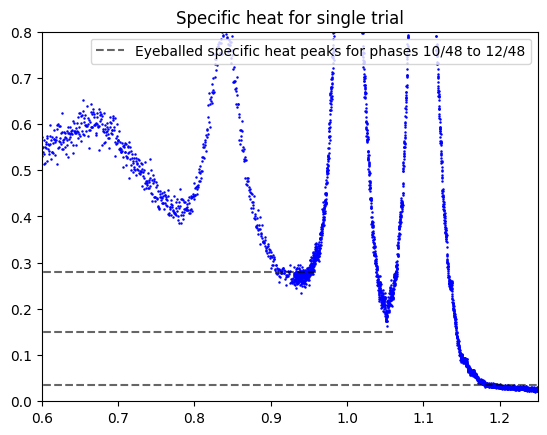

In [289]:
c_vals = df_example["Specific Heat"]
beta=1.05
plt.scatter(betas,c_vals,s=0.6,c='b')
plt.hlines([0.035,0.15,0.28],0,[1.25,1.06,0.96], linestyle='dashed',alpha=0.6,color='k',label=rf'Eyeballed specific heat peaks for phases 10/48 to 12/48')
plt.ylim(0.0,0.8)
plt.xlim(0.6,1.25)
plt.title("Specific heat for single trial")
plt.legend(loc = 'upper right')
plt.show()

In [294]:
files = sorted(glob.glob(dirpath + '/' + filepath))
print(files)

#  9/48 - [0]    10/48 - [1]
# 11/48 - [2]    12/48 - [3]
fracs = np.array([9/48,10/48,11/48,12/48])

e_vals = np.empty(shape=(len(files),len(fracs)))
e2_vals = np.empty(shape=(len(files),len(fracs)))
c_vals = np.empty(shape=(len(files),len(fracs)))
proportion_vals = np.empty(shape=(len(files),len(fracs)))

['/Users/shanekeiser/Downloads/production-run/Two-Replica_Method/0.60_kappa/48_L/1600_R/wavenum_data/2025-01-31_22-42-03/beta_0.005000.csv', '/Users/shanekeiser/Downloads/production-run/Two-Replica_Method/0.60_kappa/48_L/1600_R/wavenum_data/2025-01-31_22-42-03/beta_0.010000.csv', '/Users/shanekeiser/Downloads/production-run/Two-Replica_Method/0.60_kappa/48_L/1600_R/wavenum_data/2025-01-31_22-42-03/beta_0.015000.csv', '/Users/shanekeiser/Downloads/production-run/Two-Replica_Method/0.60_kappa/48_L/1600_R/wavenum_data/2025-01-31_22-42-03/beta_0.020000.csv', '/Users/shanekeiser/Downloads/production-run/Two-Replica_Method/0.60_kappa/48_L/1600_R/wavenum_data/2025-01-31_22-42-03/beta_0.025000.csv', '/Users/shanekeiser/Downloads/production-run/Two-Replica_Method/0.60_kappa/48_L/1600_R/wavenum_data/2025-01-31_22-42-03/beta_0.030000.csv', '/Users/shanekeiser/Downloads/production-run/Two-Replica_Method/0.60_kappa/48_L/1600_R/wavenum_data/2025-01-31_22-42-03/beta_0.035000.csv', '/Users/shanekeiser

In [510]:



for frac in [0,1,2,3]:
    for i in range(len(files)):
        df = pd.read_csv(files[i])
        energy = df[" Energy"]
        energy_sq = df[" Energy2"]
        prop = df[" frac"]
        f = prop[frac]
        e = energy[frac]
        e2 = energy_sq[frac]
        betastr = file[-12:-4]
        beta = float(betastr)

        c = (L**2)*(e2-e**2)*(beta**2)
        e_vals[i,frac] = e
        e2_vals[i,frac] = e2
        c_vals[i,frac] = c
        proportion_vals[i,frac] = f


1.040000
1.040000
1.040000
1.040000


In [512]:
print(e_vals)

[[-0.0136719 -0.0159373 -0.0186089 -0.0157118]
 [-0.0270665 -0.0273148 -0.0192399 -0.0226952]
 [-0.0407838 -0.0343293 -0.0418176 -0.0387297]
 ...
 [       nan        nan        nan -1.59716  ]
 [       nan        nan        nan -1.59748  ]
 [       nan        nan        nan -1.59771  ]]


In [507]:



# e_avg = np.nanmean(e_vals,axis=0)
# e2_avg = np.nanmean(e2_vals,axis=0)
# c_avg = np.nanmean(c_vals,axis=0)
# e_std = np.nanstd(e_vals,axis=0)
# e2_std = np.nanstd(e2_vals,axis=0)
# c_std = np.nanstd(c_vals,axis=0)

e_vals[np.isnan(e_vals)]=0
e2_vals[np.isnan(e2_vals)]=0
c_vals[np.isnan(c_vals)]=0

e_avg = np.mean(e_vals,axis=0)
e2_avg = np.mean(e2_vals,axis=0)
c_avg = np.mean(c_vals,axis=0)
e_std = np.std(e_vals,axis=0)
e2_std = np.std(e2_vals,axis=0)
c_std = np.std(c_vals,axis=0)

print(e_avg)
print(e_std)

print(c_avg)
print(c_std)



print(np.sum(proportion_vals))



[-0.34794132 -0.7636058  -1.04568165 -1.14135314]
[0.58896661 0.70966407 0.68325075 0.6861347 ]
[0.30019403 0.42669591 0.37848031 0.33709948]
[0.70025878 0.69326486 0.6756374  0.70216208]
3859.252389633


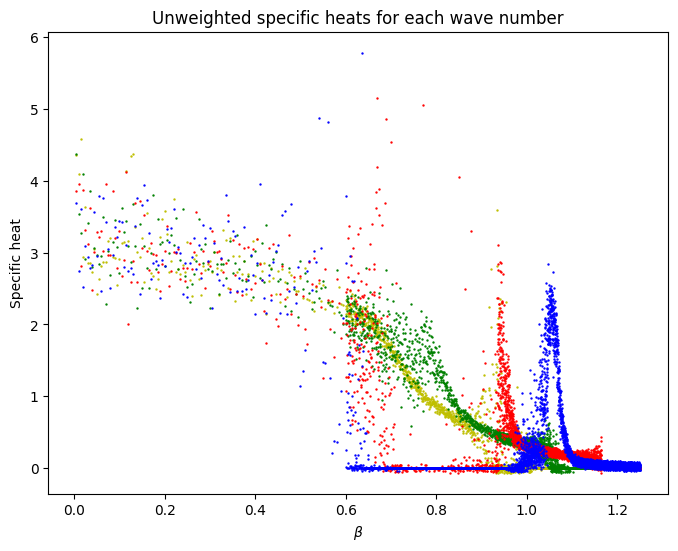

In [508]:
plt.figure(figsize=(8,6))
plt.scatter(betas,c_vals[:,0],s=0.5,c='y', label = '9/48')
plt.scatter(betas,c_vals[:,1],s=0.5,c='g', label = '10/48')
plt.scatter(betas,c_vals[:,2],s=0.5,c='r', label = '11/48')
plt.scatter(betas,c_vals[:,3],s=0.5,c='b', label = '12/48')
plt.title('Unweighted specific heats for each wave number')
plt.xlabel(r'$\beta$')
plt.ylabel('Specific heat')
plt.show()

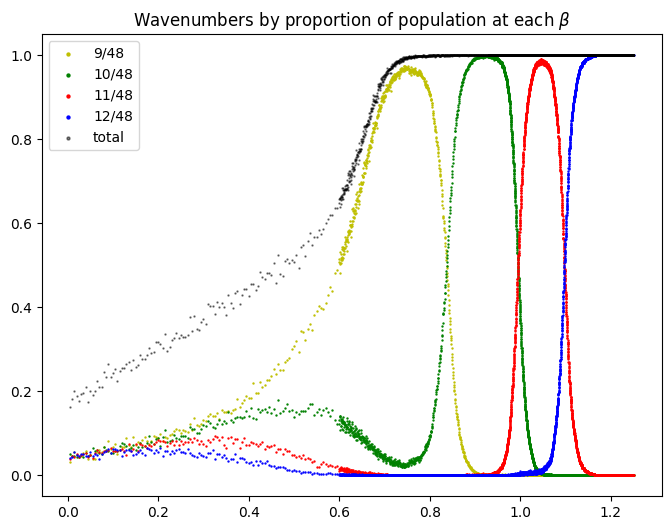

In [505]:
plt.figure(figsize=(8,6))
plt.scatter(betas,proportion_vals[:,0],s=0.5,c='y', label = '9/48')
plt.scatter(betas,proportion_vals[:,1],s=0.5,c='g', label = '10/48')
plt.scatter(betas,proportion_vals[:,2],s=0.5,c='r', label = '11/48')
plt.scatter(betas,proportion_vals[:,3],s=0.5,c='b', label = '12/48')
plt.scatter(betas,np.sum(proportion_vals,axis=1),s=0.5,c='k', alpha = 0.5, label = 'total')
plt.title(r'Wavenumbers by proportion of population at each $\beta$')
plt.legend(loc='upper left', markerscale = 3)
plt.show()

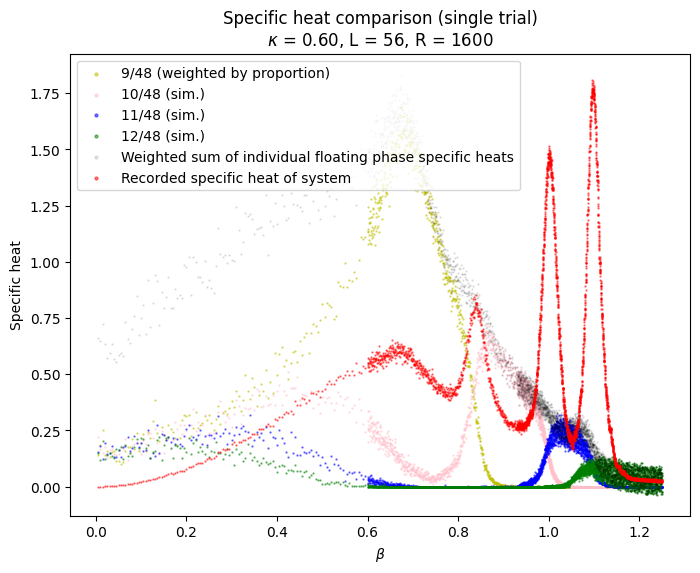

In [509]:

c_sum = c_vals[:,0]*proportion_vals[:,0] + c_vals[:,1]*proportion_vals[:,1] + c_vals[:,2]*proportion_vals[:,2] + c_vals[:,3]*proportion_vals[:,3]
plt.figure(figsize=(8,6))
plt.scatter(betas,c_vals[:,0]*proportion_vals[:,0],s=0.5,c='y',alpha=0.5, label = '9/48 (weighted by proportion)')
plt.scatter(betas,c_vals[:,1]*proportion_vals[:,1],s=0.5,c='pink',alpha=0.5, label = '10/48 (sim.)')
plt.scatter(betas,c_vals[:,2]*proportion_vals[:,2],s=0.5,c='b',alpha=0.5, label = '11/48 (sim.)')
plt.scatter(betas,c_vals[:,3]*proportion_vals[:,3],s=0.5,c='g',alpha=0.5, label = '12/48 (sim.)')
plt.scatter(betas,c_sum,s=0.5,c='k',alpha=0.1, label = 'Weighted sum of individual floating phase specific heats')
plt.scatter(betas,df_example["Specific Heat"],s=0.5,c='r',alpha=0.5, label = 'Recorded specific heat of system')
plt.title('Specific heat comparison (single trial)' + '\n' + fr"$\kappa$ = {kappastr}, L = {L}, R = {R}")
plt.ylabel('Specific heat')
plt.xlabel(r'$\beta$')
plt.legend(loc = 'upper left', markerscale = 3)
plt.show()

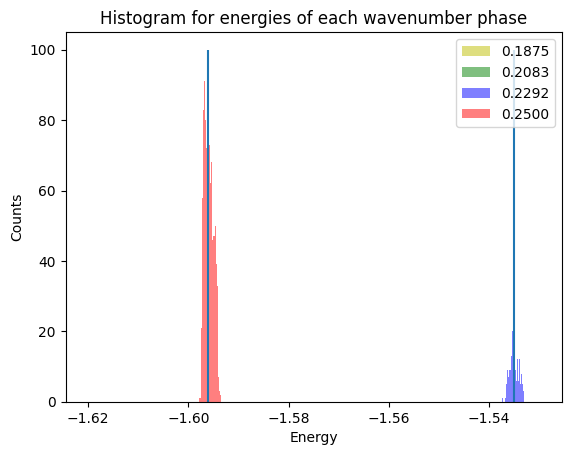

In [319]:
bins= np.linspace(-1.62,-1.53,500)


e_vals[proportion_vals < 0.98] = np.nan

plt.hist(e_vals[:,0],bins,color='y',alpha=0.5,label=f'{fracs[0]:.4f}')
plt.hist(e_vals[:,1],bins,color='g',alpha=0.5,label=f'{fracs[1]:.4f}')
plt.hist(e_vals[:,2],bins,color='b',alpha=0.5,label=f'{fracs[2]:.4f}')
plt.hist(e_vals[:,3],bins,color='r',alpha=0.5,label=f'{fracs[3]:.4f}')
plt.legend(loc='upper right')
plt.title('Histogram for energies of each wavenumber phase')
plt.xlabel('Energy')
plt.ylabel('Counts')
plt.vlines([-1.596,-1.535],0,100)
plt.show()


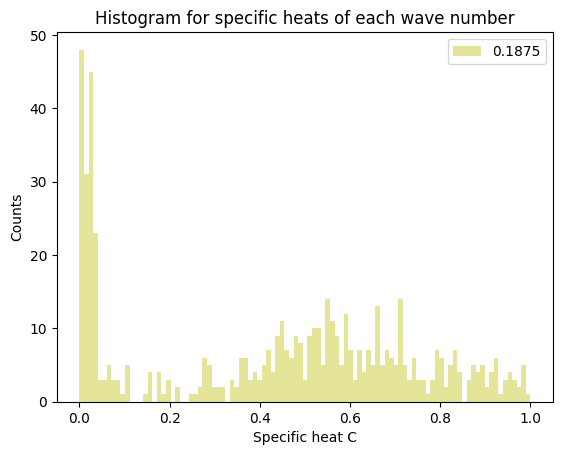

In [298]:
bins= np.linspace(0.0,1,100)
plt.hist(c_vals[:,0],bins,color='y',alpha=0.4,label=f'{fracs[0]:.4f}')
# plt.hist(c_vals[:,1],bins,color='g',alpha=0.4,label=f'{fracs[1]:.4f}')
# plt.hist(c_vals[:,2],bins,color='b',alpha=0.4,label=f'{fracs[2]:.4f}')
# plt.hist(c_vals[:,3],bins,color='r',alpha=0.4,label=f'{fracs[3]:.4f}')
# plt.semilogy()
plt.legend(loc='upper right')
# plt.vlines(x=[0.035,0.15,0.28],ymin=0,ymax=100,linestyle='dashed',color=['darkred','darkblue','darkgreen'],alpha=0.5)
# plt.text(x=0.035,y=85,s='C=0.035',fontsize=10,rotation=270)
# plt.text(x=0.15,y=87,s='C=0.15',fontsize=10,rotation=270)
# plt.text(x=0.28,y=87,s='C=0.28',fontsize=10,rotation=270)
plt.title('Histogram for specific heats of each wave number')
plt.xlabel('Specific heat C')
plt.ylabel('Counts')
plt.show()

Total energy = -1.5714286, off of -1.6 by 0.0285714
(56, 56)
There are 8 defect lines.


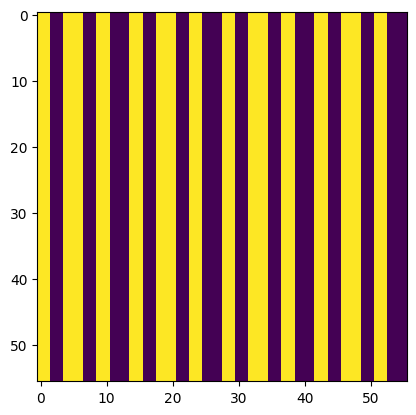

0.21428571428571427, 0.21428571428571427


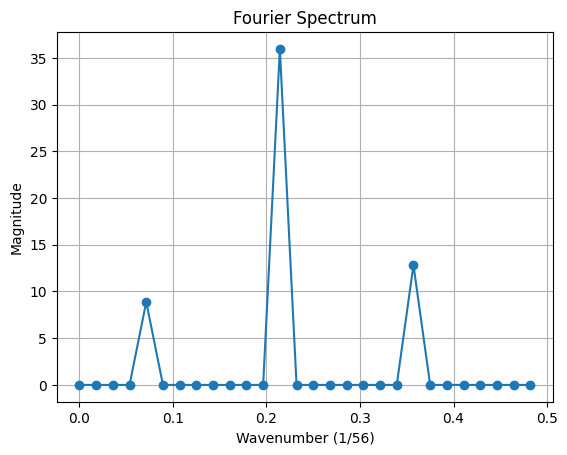

In [497]:
l_type = 2
if l_type == 1:
    lattice = np.array([1,1,-1,-1,1,1,-1,-1,1,1,-1,-1,1,1])
    lattice = np.hstack([lattice,-lattice,lattice,-lattice])
if l_type == 2:
    lattice = np.array([1,1,-1,-1,1,1,1,-1,-1,1,1,-1,-1,-1])
    lattice = np.hstack([lattice,lattice,lattice,lattice])

lattice = np.vstack([lattice,lattice,lattice,lattice,lattice,lattice,lattice])
lattice = np.vstack([lattice,lattice,lattice,lattice])
lattice = np.vstack([lattice,lattice])

def Hamiltonian(lattice):
    energy = 0
    L = len(lattice)
    k = 0.6
    for i in range(L):
        for j in range(L):
            energy -= lattice[i,j]*lattice[(i+1)%L,j]
            # energy -= lattice[i,j]*lattice[(i+2)%L,j]*k
            energy -= lattice[i,j]*lattice[i,(j+1)%L]
            energy += lattice[i,j]*lattice[i,(j+2)%L]*k
    return energy/(L**2)

energy_test1 = Hamiltonian(lattice)
print(f"Total energy = {energy_test1:.7f}, off of -1.6 by {np.abs(-1.6 - energy_test1):.7f}")
print(lattice.shape)
L=(len(lattice))
defect_counter = 0
for i in range(L):
    adder = lattice[0,i]+lattice[0,(i+1)%L]+lattice[0,(i+2)%L]
    if  adder == 3 or adder == -3:
        defect_counter += 1

print(f"There are {defect_counter} defect lines.")

plt.imshow(lattice)
plt.show()

from scipy.fft import rfft,irfft,fft,ifft, fftfreq

coeffs = fft(lattice[0,:])
wavenumbers = fftfreq(L, d=1) 
dominant_idx = np.argmax(np.abs(coeffs[1:L//2])) + 1  # Ignore zero frequency
dominant_wavenumber = wavenumbers[dominant_idx]
print(f"{dominant_wavenumber}, {12/56}" )
plt.plot(wavenumbers[:L//2], np.abs(coeffs[:L//2]), marker='o')
plt.xlabel("Wavenumber (1/56)")
plt.ylabel("Magnitude")
plt.title("Fourier Spectrum")
plt.grid()
plt.show()

(48, 48)
Total energy = -1.5833333, off of -1.6 by 0.0166667
There are 4 defect lines.
The theoretical energy difference for 4 defect lines is 0.0166667
Dominant wavenumber(/2pi) = 0.2292


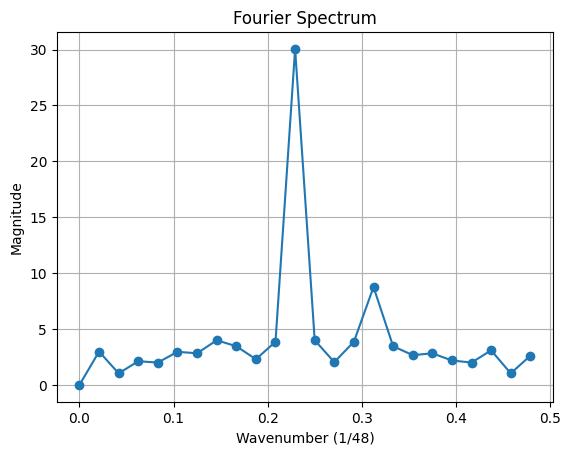

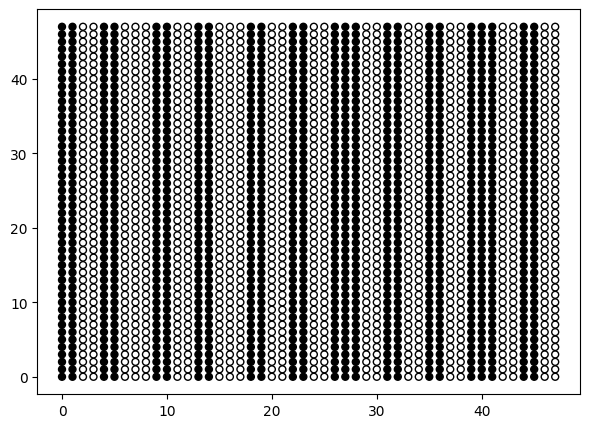

In [496]:
l_type = 2
if l_type == 1:
    lattice_48 = np.array([1,1,-1,-1])
    lattice_48 = np.tile(lattice_48, (48,12))

if l_type == 2:
    lattice_48 = np.array([1,1,-1,-1,1,1,-1,-1,-1,1,1,-1,-1,1,1,-1,-1,-1,1,1,-1,-1,1,1,-1,-1,1,1,1,-1,-1,1,1,-1,-1,1,1,-1,-1,1,1,1,-1,-1,1,1,-1,-1])
    lattice_48 = np.tile(lattice_48,(48,1))
    print(lattice_48.shape)

energy_48 = Hamiltonian(lattice_48)
print(f"Total energy = {energy_48:.7f}, off of -1.6 by {np.abs(-1.6 - energy_48):.7f}")

L = len(lattice_48)
defect_counter = 0
for i in range(L):
    adder = lattice_48[0,i]+lattice_48[0,(i+1)%L]+lattice_48[0,(i+2)%L]
    if  adder == 3 or adder == -3:
        defect_counter += 1

print(f"There are {defect_counter} defect lines.")

theoretical = (1/48)*(2-2*0.6)
print(f"The theoretical energy difference for {defect_counter} defect lines is {theoretical:.7f}")

# freqs=np.arange(1/L,1/2 + 1/L,1/L)
coeffs = fft(lattice_48[0,:])
wavenumbers = fftfreq(48, d=1) 
dominant_idx = np.argmax(np.abs(coeffs[1:48//2])) + 1  # Ignore zero frequency
dominant_wavenumber = wavenumbers[dominant_idx]
print(f"Dominant wavenumber(/2pi) = {dominant_wavenumber:.4f}")

plt.plot(wavenumbers[:48//2], np.abs(coeffs[:48//2]), marker='o')
plt.xlabel("Wavenumber (1/48)")
plt.ylabel("Magnitude")
plt.title("Fourier Spectrum")
plt.grid()
plt.show()

x = np.arange(0,48,1)
y = x
XX,YY = np.meshgrid(x,y)
colors = lattice_48
colors[colors < 0] = 0.5
plt.figure(figsize=(7,5))
plt.scatter(XX,YY,c=colors,s=25,cmap='Greys',edgecolors='black')
plt.show()
